[![Open In Colab](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/badge/open-in-colab.svg)](https://colab.research.google.com/github/crunchdao/quickstarters/blob/master/competitions/structural-break/quickstarters/baseline/baseline.ipynb)
[![Open In Kaggle](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/badge/open-in-kaggle.svg)](https://www.kaggle.com/code/crunchdao/structural-break-baseline)

![Banner](https://raw.githubusercontent.com/crunchdao/quickstarters/refs/heads/master/competitions/structural-break/assets/banner.webp)

# ADIA Lab Structural Break Challenge

## Challenge Overview

Welcome to the ADIA Lab Structural Break Challenge! In this challenge, you will analyze univariate time series data to determine whether a structural break has occurred at a specified boundary point.

### What is a Structural Break?

A structural break occurs when the process governing the data generation changes at a certain point in time. These changes can be subtle or dramatic, and detecting them accurately is crucial across various domains such as climatology, industrial monitoring, finance, and healthcare.

![Structural Break Example](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/competitions/structural-break/quickstarters/baseline/images/example.png)

### Your Task

For each time series in the test set, you need to predict a score between `0` and `1`:
- Values closer to `0` indicate no structural break at the specified boundary point;
- Values closer to `1` indicate a structural break did occur.

### Evaluation Metric

The evaluation metric is [ROC AUC (Area Under the Receiver Operating Characteristic Curve)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html), which measures the performance of detection algorithms regardless of their specific calibration.

- ROC AUC around `0.5`: No better than random chance;
- ROC AUC approaching `1.0`: Perfect detection.

# Setup

The first steps to get started are:
1. Get the setup command
2. Execute it in the cell below

### >> https://hub.crunchdao.com/competitions/structural-break/submit/notebook

![Reveal token](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/animations/reveal-token.gif)

In [3]:
print("hi")

hi


In [4]:
print("hellow world")

hellow world


In [1]:
%pip install crunch-cli --upgrade --quiet --progress-bar off
!crunch setup-notebook structural-break KoeP657CdrItLodALj6jyPFP

crunch-cli, version 7.4.0
you appear to have never submitted code before
data/X_train.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/X_train.parquet (204327238 bytes)
data/X_test.reduced.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/X_test.reduced.parquet (2380918 bytes)
data/y_train.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/y_train.parquet (61003 bytes)
data/y_test.reduced.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/y_test.reduced.parquet (2655 bytes)
                                
---
Success! Your environment has been correctly setup.
Next recommended actions:
1. Load the Crunch Toolings: `crunch = crunch.load_notebook()`
2. Execute the cells with your code
3. Run a test: `crunch.test()`
4. Download and submit your code to t

# Your model

## Setup

In [21]:
import os
import typing

# Import your dependencies
import joblib
import pandas as pd
import scipy
import sklearn.metrics
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import crunch

# Load the Crunch Toolings
crunch = crunch.load_notebook()

loaded inline runner with module: <module '__main__'>

cli version: 7.4.0
available ram: 12.67 gb
available cpu: 2 core
----


## Understanding the Data

The dataset consists of univariate time series, each containing ~2,000-5,000 values with a designated boundary point. For each time series, you need to determine whether a structural break occurred at this boundary point.

The data was downloaded when you setup your local environment and is now available in the `data/` directory.

In [4]:
# Load the data simply
X_train, y_train, X_test = crunch.load_data()

data/X_train.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/X_train.parquet (204327238 bytes)
data/X_train.parquet: already exists, file length match
data/X_test.reduced.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/X_test.reduced.parquet (2380918 bytes)
data/X_test.reduced.parquet: already exists, file length match
data/y_train.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/y_train.parquet (61003 bytes)
data/y_train.parquet: already exists, file length match
data/y_test.reduced.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/y_test.reduced.parquet (2655 bytes)
data/y_test.reduced.parquet: already exists, file length match


### Understanding `X_train`

The training data is structured as a pandas DataFrame with a MultiIndex:

**Index Levels:**
- `id`: Identifies the unique time series
- `time`: The timestep within each time series

**Columns:**
- `value`: The actual time series value at each timestep
- `period`: A binary indicator where `0` represents the **period before** the boundary point, and `1` represents the **period after** the boundary point

In [142]:
grid_searcher.fit(data_train_stats,y_train)

GridSearchCV(estimator=HistGradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05], 'max_features': [0.5],
                         'max_iter': [100]},
             scoring='roc_auc')

In [151]:
np.array(data_train_stats.iloc[0])

array([ 1.45894150e-05,  6.37186982e-06, -8.21754517e-06,  1.12821346e-04,
        1.01912827e-04,  6.98746184e-03,  6.87677837e-03, -1.10683467e-04,
        3.27270805e-02,  9.49424112e-01,  1.09085187e-05,  5.62448464e-06,
        9.09828462e-06,  9.88457771e-05,  9.32212924e-05,  9.68402530e-05,
        8.77419684e-05,  5.02894730e-02,  3.68215078e-02,  1.34679652e-02])

In [158]:
model.predict_proba(np.array(data_train_stats.iloc[201]).reshape(1,-1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([[0.45282532, 0.54717468]])

In [155]:
data_train_stats = get_stats(X_train)

In [185]:
stats_cols = ["mean_smp1","mean_smp2","mean_squared_smp1","mean_squared_smp2","mean_squared_diff_tot","mean_diff","mean_squared_diff1","mean_squared_diff2",
                "std_smp1","std_smp2","std_diff","ks_stat","ks_p","diff_squared_mean_1","diff_squared_mean_7","diff_squared_mean_30",
            "mean_squared_diff1_7","mean_squared_diff2_7","mean_squared_diff1_30",
            "mean_squared_diff2_30","range_1","range_2","range_diff","vol_1","vol_2","chow_stat"]

In [189]:
len(stats_cols)

26

In [ ]:
import seaborn as sns
sns.scatter(data=data_train_stats,x=)

In [192]:
rf_classifier.feature_importances_

array([0.04636901, 0.0482754 , 0.03063188, 0.02974402, 0.03558561,
       0.04963581, 0.03274896, 0.03297108, 0.02902262, 0.02991554,
       0.03921731, 0.05847568, 0.05769991, 0.03903549, 0.03691077,
       0.03813943, 0.03168511, 0.03049946, 0.03051367, 0.03098222,
       0.04368737, 0.04094278, 0.04225004, 0.03826287, 0.03880379,
       0.03799417])

In [202]:
target_final

,structural_breakpoint
id,
10001,False
10002,False
10003,False
10004,False
10005,False
...,...
10097,False
10098,False
10099,False


In [201]:
y_preds

array([[0.76694586, 0.23305414],
       [0.72514623, 0.27485377],
       [0.70249201, 0.29750799],
       [0.86561442, 0.13438558],
       [0.771019  , 0.228981  ],
       [0.81564303, 0.18435697],
       [0.72204331, 0.27795669],
       [0.8239695 , 0.1760305 ],
       [0.71378617, 0.28621383],
       [0.70324445, 0.29675555],
       [0.78128214, 0.21871786],
       [0.60245205, 0.39754795],
       [0.73592713, 0.26407287],
       [0.73745856, 0.26254144],
       [0.68410572, 0.31589428],
       [0.63057282, 0.36942718],
       [0.43788502, 0.56211498],
       [0.76449491, 0.23550509],
       [0.75763317, 0.24236683],
       [0.81303391, 0.18696609],
       [0.58460601, 0.41539399],
       [0.73957997, 0.26042003],
       [0.75053073, 0.24946927],
       [0.35660735, 0.64339265],
       [0.2572822 , 0.7427178 ],
       [0.60058561, 0.39941439],
       [0.71807876, 0.28192124],
       [0.44424369, 0.55575631],
       [0.69917884, 0.30082116],
       [0.77284374, 0.22715626],
       [0.

In [200]:
#rf_classifier.fit(data_train_stats,y_train)
model = HistGradientBoostingClassifier(n_iter_no_change=15, max_iter=400, learning_rate=0.01,max_features=0.9)
model.fit(data_train_stats,y_train)
from sklearn.metrics import roc_auc_score
X_test_stats = []
for dataset in X_test:
      #dataset.head()
      # Baseline approach: Compute t-test between values before and after boundary point
      # The negative p-value is used as our score - smaller p-values (larger negative numbers)
      # indicate more evidence against the null hypothesis that distributions are the same,
      # suggesting a structural break
      X_test_stats.append(get_stats(dataset).loc[0])



X_test_stats = pd.DataFrame(X_test_stats,columns = stats_cols)
y_preds = model.predict_proba(X_test_stats)
roc_auc_score(target_final,y_preds[:,1])



np.float64(0.6694835680751173)

In [170]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {"n_estimators":[100,200]}

rf_classifier = RandomForestClassifier()

rf_grid_search = GridSearchCV(rf_classifier,param_grid = param_grid)

cv_results_rf = pd.DataFrame(cross_validate(rf_grid_search,data_train_stats,y_train,scoring="roc_auc",cv=2))
cv_results_rf

,fit_time,score_time,test_score
0,46.157098,0.155357,0.667612
1,46.003146,0.157717,0.667658


In [173]:
rf_grid_search.fit(data_train_stats,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200]})

In [157]:
data_train_stats.iloc[201]

model = HistGradientBoostingClassifier(n_iter_no_change=15, max_iter=150, learning_rate=0.05)
model.fit(data_train_stats,y_train)
model.score()

HistGradientBoostingClassifier(learning_rate=0.05, max_iter=150,
                               n_iter_no_change=15)

In [181]:
data_train_stats = get_stats(X_train)

In [275]:
y_train[1]

np.False_

2247


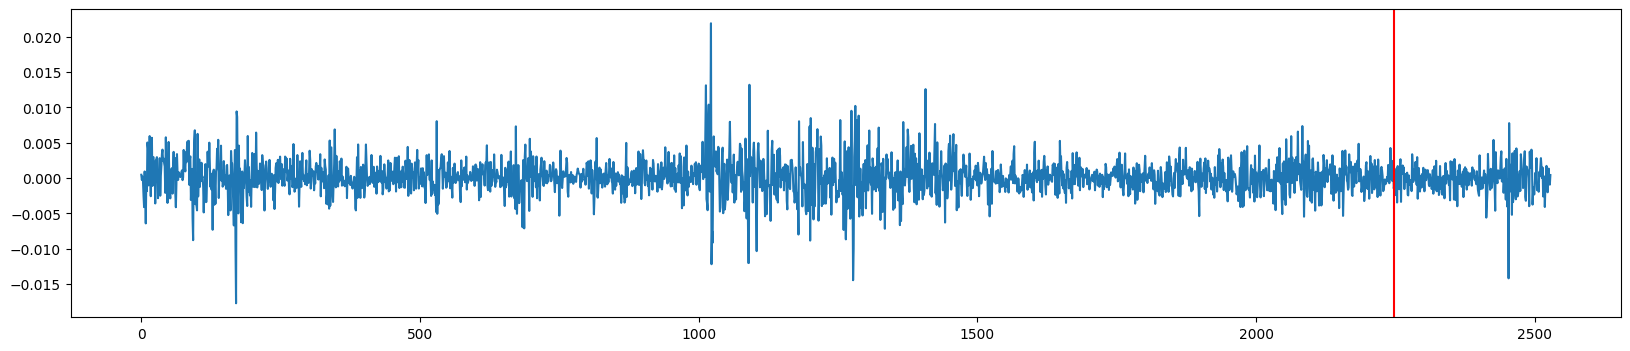

In [273]:

df =X_train.loc[1]
idx = np.array(df.period==0)

structural_change = idx.sum()
print(structural_change)
plt.figure(figsize=(20,4))
plt.plot(df.index,df.value)
plt.axvline(structural_change,color = "red")

N1 = idx.sum()
N2 = len(df.value)-N1

In [295]:
np.array(cumsum1)

array([-0.02762564, -0.0437698 , -0.03729477, ...,  0.88497526,
        0.88162423,  0.86590138])

-6.644346698400313e-05


/tmp/ipython-input-4256792443.py:24: RuntimeWarning: Mean of empty slice.
  cumsum1_bin_means = [cumsum1[digitized == i].mean() for i in range(1, len(bins))]
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipython-input-4256792443.py:31: RuntimeWarning: Mean of empty slice.
  cumsum2_bin_means = [cumsum2[digitized == i].mean() for i in range(1, len(bins))]


[np.float64(0.003682232934584939),
 np.float64(0.01600234910962339),
 np.float64(0.024748578200555194),
 np.float64(0.03572403425774238),
 np.float64(0.04552929555769967),
 np.float64(0.05435771437450095),
 np.float64(0.06556948292014661),
 np.float64(0.07708773636989001),
 np.float64(0.08515007028283794),
 np.float64(0.09353905002991028),
 np.float64(0.10529148316569001),
 np.float64(0.1156024282894497),
 np.float64(nan),
 np.float64(0.13535131666355457),
 np.float64(0.14692033348213734),
 np.float64(0.15674483419195823),
 np.float64(0.16649897536018177),
 np.float64(0.17706754748944525),
 np.float64(0.18706449855224672),
 np.float64(0.1985228911654808),
 np.float64(0.20665148314445084),
 np.float64(0.21740422298825715),
 np.float64(0.22676974419607115),
 np.float64(0.2365387756249676),
 np.float64(0.24770834908847233),
 np.float64(0.2588486471222286),
 np.float64(0.2680989541529504),
 np.float64(0.2762968904328461),
 np.float64(0.28818820334719736),
 np.float64(0.29719968427848964),


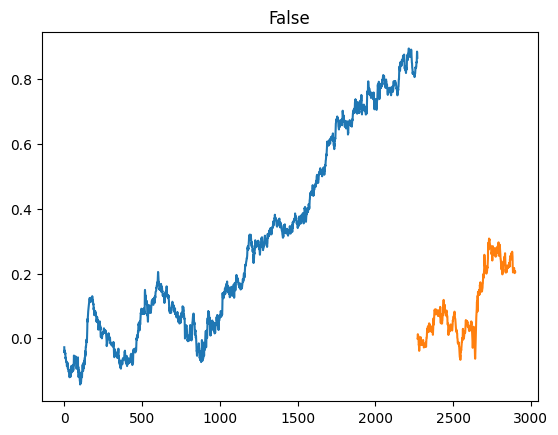

In [296]:
i = 3
df = X_train.loc[i]
idx = np.array(df.period==0)
N1 = idx.sum()
N2 = len(df.value)-N1

smp1 = df.value[idx]
smp2 = df.value[~idx]
plt.plot(df.value[idx].cumsum())
plt.plot(df.value[~idx].cumsum())



plt.title(f"{y_train[i]}")
grad_1 = (df.value[idx].cumsum().iloc[-1]-df.value[idx].cumsum().iloc[0])/(N1)
grad_2 = (df.value[~idx].cumsum().iloc[-1]-df.value[~idx].cumsum().iloc[0])/(N2)
print(grad_2-grad_1)


#data = np.random.random(100)
cumsum1 = np.array(smp1.cumsum())
bins = np.linspace(0, 1.0, 100)
digitized = np.digitize(cumsum1, bins)
cumsum1_bin_means = [cumsum1[digitized == i].mean() for i in range(1, len(bins))]
cumsum1_bin_means


cumsum2= np.array(smp2.cumsum())

digitized = np.digitize(cumsum2, bins)
cumsum2_bin_means = [cumsum2[digitized == i].mean() for i in range(1, len(bins))]
cumsum2_bin_means

In [278]:
df.value[idx].cumsum()

,value
time,
0,4.700519e-04
1,2.161411e-04
2,4.390401e-04
3,1.279014e-07
4,-2.515212e-03
...,...
2242,2.852536e-01
2243,2.852331e-01
2244,2.848541e-01


In [39]:
max(df.value[idx]) - min(df.value[idx])

0.1735974605016119

In [40]:
max(df.value[~idx]) - min(df.value[~idx])

0.213967677370904

In [284]:
#Lets make a function that takes as input one of the distributions and then calculates std_dev of the two samples, mean of two samples, KS_test results
#I will have some other function that loops through the dfs in the multiindex df and apply this






def interesting_stats(df):
    idx = np.array(df.period==0)
  #creates index where 0 is before structed break

    smp1 = df.iloc[idx].value
    smp2 = df.iloc[~idx].value

    mean_smp1 = smp1.mean()
    mean_smp2 = smp2.mean()

    mean_squared_smp1 = (smp1**2).mean()
    mean_squared_smp2 = (smp2**2).mean()

    mean_squared_diff_tot = mean_squared_smp2 - mean_squared_smp1


    mean_diff = mean_smp2 - mean_smp1

    std_smp1 = smp1.std()
    std_smp2 = smp2.std()

    std_diff = abs(std_smp2 - std_smp1)

    smp1_shift = smp1.shift(1)
    smp2_shift = smp2.shift(1)

    smp1_shift7 = smp1.shift(7)
    smp2_shift7 = smp2.shift(7)

    smp1_shift30 = smp1.shift(30)
    smp2_shift30 = smp2.shift(30)


    diffs_1 = smp1-smp1_shift
    diffs_2 = smp2-smp2_shift

    diffs_1_7 = smp1-smp1_shift7
    diffs_2_7 = smp2-smp2_shift7

    diffs_1_30 = smp1-smp1_shift30
    diffs_2_30 = smp2-smp2_shift30







    squared_diff1 = (diffs_1**2)
    mean_squared_diff1 = squared_diff1.mean()

    squared_diff2 = (diffs_2**2)
    mean_squared_diff2 = squared_diff2.mean()

    diff_squared_mean_1 = abs(mean_squared_diff2 - mean_squared_diff1)

    squared_diff1_7 = (diffs_1_7**2)
    mean_squared_diff1_7 = squared_diff1_7.mean()

    squared_diff2_7 = (diffs_2_7**2)
    mean_squared_diff2_7 = squared_diff2_7.mean()

    diff_squared_mean_7 = abs(mean_squared_diff2_7 - mean_squared_diff1_7)

    squared_diff1_30 = (diffs_1_30**2)
    mean_squared_diff1_30 = squared_diff1_30.mean()

    squared_diff2_30 = (diffs_2_30**2)
    mean_squared_diff2_30 = squared_diff2_30.mean()

    diff_squared_mean_30 = abs(mean_squared_diff2_30 - mean_squared_diff1_30)

    range_1 = max(smp1) - min(smp1)
    range_2 = max(smp2) - min(smp2)

    range_diff = abs(range_2-range_1)

    vol_1 = std_smp1 * np.sqrt(idx.sum())
    vol_2 = std_smp2 * np.sqrt(len(idx)-idx.sum())

    vol_diff = abs(vol_2-vol_1)

    ks_stat = stats.ks_2samp(smp1, smp2).statistic
    ks_p = stats.ks_2samp(smp1, smp2).pvalue




    #now chow test stats

    Sc = (df.value**2).sum()
    S1 = (smp1**2).sum()
    S2 = (smp2**2).sum()
    N1 = idx.sum()
    N2 = len(idx)-idx.sum()
    k = 3

    #chow_stat = (Sc - S1 -S2)*(N1+N2-2*k)/(k*(S1+S2))

    avg_squared_resids_1 = S1/N1
    avg_squared_resids_2 = S2/N2

    diff_average_squared_resids = abs((S2/N2)-(S1/N1))


    grad_1 = (smp1.cumsum().iloc[-1]-smp1.cumsum().iloc[0])/(N1)
    grad_2 = (smp2.cumsum().iloc[-1]-smp2.cumsum().iloc[0])/(N2)
    grad_diff = grad_2 - grad_1


    return [mean_smp1, mean_smp2,mean_squared_smp1,mean_squared_smp2,mean_squared_diff_tot, mean_diff, mean_squared_diff1,
            mean_squared_diff2,std_smp1,std_smp2,std_diff,ks_stat,ks_p,
            diff_squared_mean_1,diff_squared_mean_7,diff_squared_mean_30,
            mean_squared_diff1_7,mean_squared_diff2_7,mean_squared_diff1_30,
            mean_squared_diff2_30,range_1,range_2,range_diff,vol_1,vol_2,avg_squared_resids_1,avg_squared_resids_2,
            diff_average_squared_resids,vol_diff,grad_diff]



def get_stats(all_data):

    outer_indicies = list(set(all_data.index.get_level_values("id")))
    #print("heres outer",outer_indicies)
    the_stats = []


    for outer_idx in outer_indicies:
      the_stats.append(interesting_stats(all_data.loc[outer_idx]))
      #print("herers all data.loc",all_data.loc[outer_idx])




    stats_cols = ["mean_smp1","mean_smp2","mean_squared_smp1","mean_squared_smp2","mean_squared_diff_tot","mean_diff","mean_squared_diff1","mean_squared_diff2",
                "std_smp1","std_smp2","std_diff","ks_stat","ks_p","diff_squared_mean_1","diff_squared_mean_7","diff_squared_mean_30",
            "mean_squared_diff1_7","mean_squared_diff2_7","mean_squared_diff1_30",
            "mean_squared_diff2_30","range_1","range_2","range_diff","vol_1","vol_2","avg_squared_resids_1","avg_squared_resids_2",
            "diff_average_squared_resids","vol_diff","grad_diff"]
    return pd.DataFrame(the_stats,columns=stats_cols)


good_features = ["mean_squared_diff_tot","std_diff","ks_stat","ks_p","diff_squared_mean_1","diff_squared_mean_7","diff_squared_mean_30","range_diff",
                 "diff_average_squared_resids","vol_diff"
                 ]

def get_test_stats(df):
  stats_cols = ["mean_smp1","mean_smp2","mean_diff","mean_squared_diff1","mean_squared_diff2",
                "std_smp1","std_smp2","std_diff","ks_stat","ks_p","diff_squared_mean_1","diff_squared_mean_7","diff_squared_mean_30",
            "mean_squared_diff1_7","mean_squared_diff2_7","mean_squared_diff1_30",
            "mean_squared_diff2_30","range_1","range_2","range_diff"]
  the_stats = interesting_stats(df)

  return the_stats


In [287]:
test = get_stats(X_train.loc[0:10])
test.head()

,mean_smp1,mean_smp2,mean_squared_smp1,mean_squared_smp2,mean_squared_diff_tot,mean_diff,mean_squared_diff1,mean_squared_diff2,std_smp1,std_smp2,...,range_1,range_2,range_diff,vol_1,vol_2,avg_squared_resids_1,avg_squared_resids_2,diff_average_squared_resids,vol_diff,grad_diff
0,0.000015,0.000006,0.000049,0.000047,-1.659425e-06,-0.000008,0.000113,0.000102,0.006987,0.006877,...,0.050289,0.036822,0.013468,0.256831,0.117912,0.000049,0.000047,1.659425e-06,0.138919,0.000055
1,0.000128,-0.000090,0.000006,0.000004,-2.249095e-06,-0.000218,0.000012,0.000009,0.002524,0.002036,...,0.039567,0.021932,0.017636,0.119667,0.034186,0.000006,0.000004,2.249095e-06,0.085481,-0.000213
2,0.000389,0.001790,0.000297,0.000527,2.299779e-04,0.001400,0.000657,0.001229,0.017221,0.022900,...,0.173597,0.213968,0.040370,0.831811,0.519675,0.000297,0.000527,2.299779e-04,0.312136,0.001393
3,0.000381,0.000326,0.000070,0.000086,1.572034e-05,-0.000055,0.000142,0.000163,0.008388,0.009286,...,0.108453,0.080223,0.028231,0.399721,0.232879,0.000070,0.000086,1.572034e-05,0.166842,-0.000066
4,-0.000016,0.000024,0.000011,0.000012,6.163742e-07,0.000040,0.000010,0.000010,0.003314,0.003408,...,0.019612,0.018499,0.001112,0.134881,0.072775,0.000011,0.000012,6.163742e-07,0.062107,0.000042


In [227]:
data_train_stats.head()

,mean_smp1,mean_smp2,mean_squared_smp1,mean_squared_smp2,mean_squared_diff_tot,mean_diff,mean_squared_diff1,mean_squared_diff2,std_smp1,std_smp2,...,mean_squared_diff2_30,range_1,range_2,range_diff,vol_1,vol_2,avg_squared_resids_1,avg_squared_resids_2,diff_average_squared_resids,vol_diff
0,0.000015,0.000006,0.000049,0.000047,-1.659425e-06,-0.000008,0.000113,0.000102,0.006987,0.006877,...,0.000088,0.050289,0.036822,0.013468,0.256831,0.117912,0.000049,0.000047,1.659425e-06,0.138919
1,0.000128,-0.000090,0.000006,0.000004,-2.249095e-06,-0.000218,0.000012,0.000009,0.002524,0.002036,...,0.000008,0.039567,0.021932,0.017636,0.119667,0.034186,0.000006,0.000004,2.249095e-06,0.085481
2,0.000389,0.001790,0.000297,0.000527,2.299779e-04,0.001400,0.000657,0.001229,0.017221,0.022900,...,0.001121,0.173597,0.213968,0.040370,0.831811,0.519675,0.000297,0.000527,2.299779e-04,0.312136
3,0.000381,0.000326,0.000070,0.000086,1.572034e-05,-0.000055,0.000142,0.000163,0.008388,0.009286,...,0.000165,0.108453,0.080223,0.028231,0.399721,0.232879,0.000070,0.000086,1.572034e-05,0.166842
4,-0.000016,0.000024,0.000011,0.000012,6.163742e-07,0.000040,0.000010,0.000010,0.003314,0.003408,...,0.000021,0.019612,0.018499,0.001112,0.134881,0.072775,0.000011,0.000012,6.163742e-07,0.062107


In [230]:
m_info = mutual_info_classif(data_train_stats,y_train)

In [232]:
stats_cols = ["mean_smp1","mean_smp2","mean_squared_smp1","mean_squared_smp2","mean_squared_diff_tot","mean_diff","mean_squared_diff1","mean_squared_diff2",
                "std_smp1","std_smp2","std_diff","ks_stat","ks_p","diff_squared_mean_1","diff_squared_mean_7","diff_squared_mean_30",
            "mean_squared_diff1_7","mean_squared_diff2_7","mean_squared_diff1_30",
            "mean_squared_diff2_30","range_1","range_2","range_diff","vol_1","vol_2","avg_squared_resids_1","avg_squared_resids_2",
            "diff_average_squared_resids","vol_diff"]

In [240]:
data_best_Fnova.get_feature_names_out()

AttributeError: 'numpy.ndarray' object has no attribute 'get_feature_names_out'

AttributeError: 'Pipeline' object has no attribute 'validation_score_'

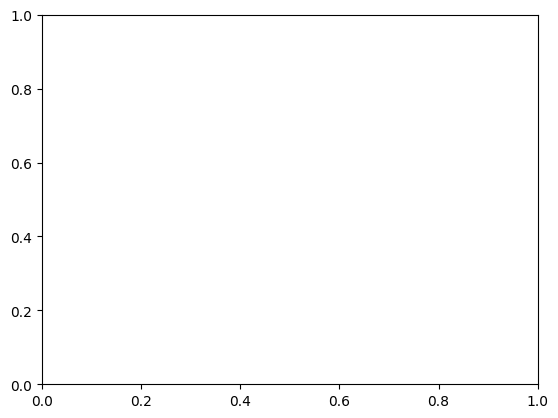

In [264]:
from sklearn.kernel_approximation import Nystroem

common_params = {
    "max_iter": 1_000,
    "learning_rate": 0.003,
    "validation_fraction": 0.2,
    "random_state": 42,
    "categorical_features": None,
    "scoring": "roc_auc",
    "n_iter_no_change":25,
    "max_features":0.2
}


X = data_train_stats
y = y_train
hgbt = HistGradientBoostingClassifier(early_stopping=True, **common_params)
model = make_pipeline(StandardScaler(),Nystroem(),hgbt)
model.fit(X, y)

_, ax = plt.subplots()
plt.plot(model[-1].validation_score_)
_ = ax.set(
    xlabel="number of iterations",
    ylabel="roc_auc",
    title=f"Loss of hgbt with early stopping (n_iter={model[-1].n_iter_})",
)

In [257]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

X = data_train_stats
y = y_train
model.fit(X,y)
min_features_to_select = 1  # Minimum number of features to consider
clf = model
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

ValueError: when `importance_getter=='auto'`, the underlying estimator HistGradientBoostingClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [241]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2


#data_best_chi = SelectKBest(chi2,k=10).fit_transform(data_train_stats, y_train)

data_best_Fnova = SelectKBest(k=10).fit_transform(data_train_stats, y_train)

data_best_mutual_info = SelectKBest(mutual_info_classif,k=10).fit_transform(data_train_stats, y_train).get_feature_names_out()

AttributeError: 'numpy.ndarray' object has no attribute 'get_feature_names_out'

In [ ]:
cols_Fnova = SelectKBest(k=10).get_feature_names_out

In [220]:
good_features = ["mean_squared_diff_tot","std_diff","ks_stat","ks_p","diff_squared_mean_1","diff_squared_mean_7","diff_squared_mean_30","range_diff",
                 "diff_average_squared_resids","vol_diff"]

random_features = np.random_shuffle()
stats_cols = ["mean_smp1","mean_smp2","mean_squared_smp1","mean_squared_smp2","mean_squared_diff_tot","mean_diff","mean_squared_diff1","mean_squared_diff2",
                "std_smp1","std_smp2","std_diff","ks_stat","ks_p","diff_squared_mean_1","diff_squared_mean_7","diff_squared_mean_30",
            "mean_squared_diff1_7","mean_squared_diff2_7","mean_squared_diff1_30",
            "mean_squared_diff2_30","range_1","range_2","range_diff","vol_1","vol_2","avg_squared_resids_1","avg_squared_resids_2",
            "diff_average_squared_resids","vol_diff"]


data_good = data_train_stats[good_features]
model = HistGradientBoostingClassifier(max_iter = 150, learning_rate = 0.05)
cv_inner = StratifiedKFold(shuffle = True, random_state = 123,n_splits = 10)


cv_results = cross_validate(model, data_good,y_train, return_train_score=True,return_estimator=True,cv=cv_inner,scoring = "roc_auc")

pd.DataFrame(cv_results)



,fit_time,score_time,estimator,test_score,train_score
0,0.493172,0.021774,HistGradientBoostingClassifier(learning_rate=0...,0.616001,0.879664
1,0.476527,0.023230,HistGradientBoostingClassifier(learning_rate=0...,0.622445,0.877865
2,0.439080,0.021663,HistGradientBoostingClassifier(learning_rate=0...,0.649431,0.874987
3,0.747078,0.027549,HistGradientBoostingClassifier(learning_rate=0...,0.595626,0.875611
4,0.725718,0.030435,HistGradientBoostingClassifier(learning_rate=0...,0.638293,0.879155
5,0.631330,0.021641,HistGradientBoostingClassifier(learning_rate=0...,0.603619,0.880728
6,0.447825,0.021670,HistGradientBoostingClassifier(learning_rate=0...,0.616262,0.872344
7,0.476338,0.023206,HistGradientBoostingClassifier(learning_rate=0...,0.593876,0.877872
8,0.750632,0.021893,HistGradientBoostingClassifier(learning_rate=0...,0.623273,0.877575
9,0.456111,0.023595,HistGradientBoostingClassifier(learning_rate=0...,0.620418,0.874028


In [221]:
model = HistGradientBoostingClassifier(max_iter = 150, learning_rate = 0.05)
cv_inner = StratifiedKFold(shuffle = True, random_state = 123,n_splits = 10)


cv_results = cross_validate(model, data_train_stats,y_train, return_train_score=True,return_estimator=True,cv=cv_inner,scoring = "roc_auc")

pd.DataFrame(cv_results)


,fit_time,score_time,estimator,test_score,train_score
0,0.818878,0.021531,HistGradientBoostingClassifier(learning_rate=0...,0.672107,0.909034
1,0.829856,0.023523,HistGradientBoostingClassifier(learning_rate=0...,0.677654,0.910889
2,0.878527,0.022459,HistGradientBoostingClassifier(learning_rate=0...,0.707046,0.910538
3,1.028380,0.027257,HistGradientBoostingClassifier(learning_rate=0...,0.659784,0.914439
4,1.348701,0.031250,HistGradientBoostingClassifier(learning_rate=0...,0.732715,0.908725
5,0.816183,0.021934,HistGradientBoostingClassifier(learning_rate=0...,0.667820,0.908832
6,0.886278,0.023788,HistGradientBoostingClassifier(learning_rate=0...,0.686010,0.905168
7,0.817386,0.021964,HistGradientBoostingClassifier(learning_rate=0...,0.662850,0.907234
8,0.811283,0.021710,HistGradientBoostingClassifier(learning_rate=0...,0.680703,0.907178
9,0.884263,0.023151,HistGradientBoostingClassifier(learning_rate=0...,0.674984,0.912672


In [218]:
data_train_stats[good_features]

,mean_squared_diff_tot,std_diff,ks_stat,ks_p,diff_squared_mean_1,diff_squared_mean_7,diff_squared_mean_30,range_diff,diff_average_squared_resids,vol_diff
0,-1.659425e-06,0.000111,0.032727,9.494241e-01,1.090852e-05,5.624485e-06,9.098285e-06,0.013468,1.659425e-06,0.138919
1,-2.249095e-06,0.000489,0.081409,6.792103e-02,2.763886e-06,3.015238e-06,4.773181e-06,0.017636,2.249095e-06,0.085481
2,2.299779e-04,0.005678,0.090388,1.878266e-03,5.728637e-04,4.592610e-04,5.097719e-04,0.040370,2.299779e-04,0.312136
3,1.572034e-05,0.000898,0.040356,3.866056e-01,2.126740e-05,3.595559e-05,2.163651e-05,0.028231,1.572034e-05,0.166842
4,6.163742e-07,0.000094,0.022053,9.932240e-01,3.959681e-08,4.001967e-07,2.843801e-07,0.001112,6.163742e-07,0.062107
...,...,...,...,...,...,...,...,...,...,...
9996,-3.544936e-05,0.002804,0.181426,3.640543e-13,5.994105e-05,6.711379e-05,7.154230e-05,0.001574,3.544936e-05,0.243021
9997,8.189078e-07,0.000053,0.049890,4.249627e-01,2.328257e-06,2.411841e-07,2.186562e-06,0.001622,8.189078e-07,0.139880
9998,5.041445e-07,0.000037,0.014569,9.985331e-01,2.619074e-06,3.973869e-06,7.003134e-06,0.006424,5.041445e-07,0.142604
9999,-3.952583e-07,0.000193,0.057942,3.145019e-02,1.087528e-06,8.581475e-07,6.912351e-07,0.001818,3.952583e-07,0.022457


In [47]:
data_train_stats = get_stats(X_train)

In [107]:
stats_cols = ["mean_smp1","mean_smp2","mean_diff","mean_squared_diff1","mean_squared_diff2",
                "std_smp1","std_smp2","std_diff","ks_stat","ks_p","diff_squared_mean_1","diff_squared_mean_7","diff_squared_mean_30",
            "mean_squared_diff1_7","mean_squared_diff2_7","mean_squared_diff1_30",
            "mean_squared_diff2_30","range_1","range_2","range_diff","vol_1","vol_2"]

In [90]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier

preprocessor = StandardScaler()
ridge_clf = RidgeClassifierCV(store_cv_results = True)

ridge_pipe = make_pipeline(preprocessor,ridge_clf)

bagged_ridgeCV = BaggingClassifier(ridge_pipe, max_samples = 0.3, max_features = 0.3 ,n_estimators = 1000)

bagged_ridgeCV.fit(data_train_stats, y_train)

BaggingClassifier(estimator=Pipeline(steps=[('standardscaler',
                                             StandardScaler()),
                                            ('ridgeclassifiercv',
                                             RidgeClassifierCV(store_cv_results=True))]),
                  max_features=0.3, max_samples=0.3, n_estimators=1000)

In [109]:
 from sklearn.metrics import roc_auc_score
 X_test_stats = []
 for dataset in X_test:
        #dataset.head()
        # Baseline approach: Compute t-test between values before and after boundary point
        # The negative p-value is used as our score - smaller p-values (larger negative numbers)
        # indicate more evidence against the null hypothesis that distributions are the same,
        # suggesting a structural break
        X_test_stats.append(get_stats(dataset).loc[0])



X_test_stats = pd.DataFrame(X_test_stats,columns = stats_cols)
y_preds = bagged_ridgeCV.predict_proba(X_test_stats)
roc_auc_score(target_final,y_preds[:,1])




In [114]:
roc_auc_score(target_final,y_preds[:,1])

np.float64(0.5307511737089202)

In [141]:
#cell block for nested cv for a HistGrad boosted classifier

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold,GridSearchCV



param_grid= {"max_iter":[100],
             "learning_rate":[0.05]
             ,"max_features":[0.5]}


model = HistGradientBoostingClassifier(n_iter_no_change=10)
inner_cv = StratifiedKFold(n_splits=5)
outer_cv = StratifiedKFold(n_splits = 10)

grid_searcher = GridSearchCV(model,param_grid=param_grid,scoring="roc_auc")


#grid_searcher.fit(data_stats,target)

#cv_results_2 = cross_validate(grid_searcher, data_train_stats, y_train,cv=outer_cv,scoring = "roc_auc",return_train_score=True,return_estimator=True)

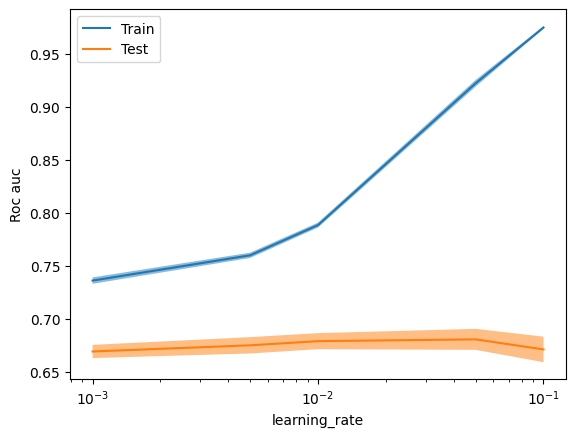

In [118]:
from sklearn.model_selection import ValidationCurveDisplay

l_rates =[0.001,0.005,0.01,0.05,0.1]
estimator = HistGradientBoostingClassifier(n_iter_no_change=10, max_iter = 200, max_features = 0.2)

ValidationCurveDisplay.from_estimator(estimator, data_train_stats,y_train,param_name="learning_rate",param_range=l_rates,scoring="roc_auc")

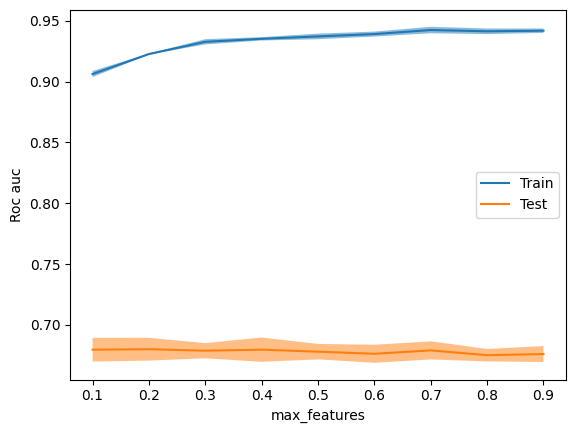

In [117]:
from sklearn.model_selection import ValidationCurveDisplay

max_features = np.arange(0.1,1.0,0.1)
estimator = HistGradientBoostingClassifier(n_iter_no_change=10, max_iter = 200, learning_rate = 0.05)

ValidationCurveDisplay.from_estimator(estimator, data_train_stats,y_train,param_name="max_features",param_range=max_features,scoring="roc_auc")

In [119]:
np.arange(0.1,1.0,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

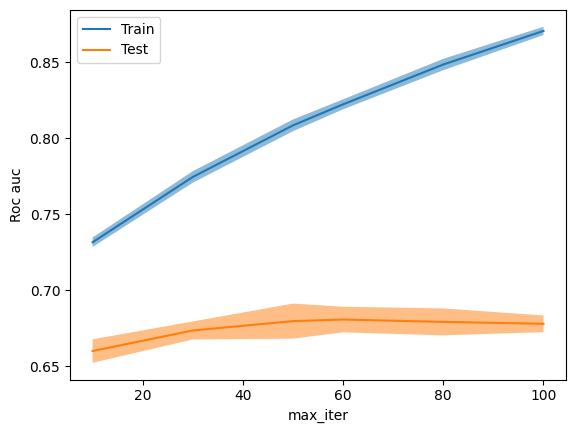

In [122]:
from sklearn.model_selection import ValidationCurveDisplay

n_ests = [10,30,50,60,80,100]
estimator = HistGradientBoostingClassifier(n_iter_no_change=10, learning_rate = 0.05, max_features=0.5)

ValidationCurveDisplay.from_estimator(estimator, data_train_stats,y_train,param_name="max_iter",param_range=n_ests,scoring="roc_auc")

In [ ]:
 from sklearn.metrics import roc_auc_score
 preds = []
 for dataset in X_test:
        #dataset.head()
        # Baseline approach: Compute t-test between values before and after boundary point
        # The negative p-value is used as our score - smaller p-values (larger negative numbers)
        # indicate more evidence against the null hypothesis that distributions are the same,
        # suggesting a structural break
        data_X_test_stats = get_stats(dataset)

        preds.append(cv_results_2.predict(data_X_test_stats))
roc_auc_score(target_final,preds)

In [84]:
pd.DataFrame(cv_results_2).

,fit_time,score_time,estimator,test_score,train_score
0,25.298383,0.119117,GridSearchCV(estimator=HistGradientBoostingCla...,0.664745,0.919737
1,25.411887,0.129856,GridSearchCV(estimator=HistGradientBoostingCla...,0.685920,0.916586
2,25.279031,0.116581,GridSearchCV(estimator=HistGradientBoostingCla...,0.688691,0.921265
3,25.289780,0.123037,GridSearchCV(estimator=HistGradientBoostingCla...,0.674165,0.917063
4,25.457754,0.140828,GridSearchCV(estimator=HistGradientBoostingCla...,0.702587,0.916574
5,25.225574,0.147021,GridSearchCV(estimator=HistGradientBoostingCla...,0.691138,0.919310
6,25.826658,0.118576,GridSearchCV(estimator=HistGradientBoostingCla...,0.676462,0.917829
7,25.521267,0.120608,GridSearchCV(estimator=HistGradientBoostingCla...,0.701070,0.918173
8,25.538904,0.118837,GridSearchCV(estimator=HistGradientBoostingCla...,0.674417,0.917311
9,25.372986,0.122313,GridSearchCV(estimator=HistGradientBoostingCla...,0.693160,0.920490


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (101,) + inhomogeneous part.

In [85]:
cv_results_2 = pd.DataFrame(cv_results_2)
best_params_2 = [est.best_params_ for est in cv_results_2.estimator]

In [160]:
cv_results_2.best_estimator_

AttributeError: 'DataFrame' object has no attribute 'best_estimator_'

In [86]:
best_params_2

[{'learning_rate': 0.01, 'max_features': 0.25, 'max_iter': 1000},
 {'learning_rate': 0.01, 'max_features': 0.25, 'max_iter': 1000},
 {'learning_rate': 0.01, 'max_features': 0.25, 'max_iter': 1000},
 {'learning_rate': 0.01, 'max_features': 0.25, 'max_iter': 1000},
 {'learning_rate': 0.01, 'max_features': 0.25, 'max_iter': 1000},
 {'learning_rate': 0.01, 'max_features': 0.25, 'max_iter': 1000},
 {'learning_rate': 0.01, 'max_features': 0.25, 'max_iter': 1000},
 {'learning_rate': 0.01, 'max_features': 0.25, 'max_iter': 1000},
 {'learning_rate': 0.01, 'max_features': 0.25, 'max_iter': 1000},
 {'learning_rate': 0.01, 'max_features': 0.25, 'max_iter': 1000}]

### Understanding `y_train`

This is a simple `pandas.Series` that tells if a dataset id has a structural breakpoint or not.

**Index:**
- `id`: the ID of the dataset

**Value:**
- `structural_breakpoint`: Boolean indicating whether a structural break occurred (`True`) or not (`False`)

In [12]:
y_train

,structural_breakpoint
id,
0,False
1,False
2,True
3,False
4,False
...,...
9996,False
9997,False
9998,False


### Understanding `X_test`

The test data is provided as a **`list` of `pandas.DataFrame`s** with the same format as [`X_train`](#understanding-X_test).

It is structured as a list to encourage processing records one by one, which will be mandatory in the `infer()` function.

In [111]:
print("Number of datasets:", len(X_test))

Number of datasets: 101


In [112]:
X_test[0]

value  period
id    time                  
10001 0     0.010753       0
      1    -0.031915       0
      2    -0.010989       0
      3    -0.011111       0
      4     0.011236       0
...              ...     ...
      2774 -0.013937       1
      2775 -0.015649       1
      2776 -0.009744       1
      2777  0.025375       1
      2778 -0.001515       1

[2779 rows x 2 columns]

## Strategy Implementation

There are multiple approaches you can take to detect structural breaks:

1. **Statistical Tests**: Compare distributions before and after the boundary point;
2. **Feature Engineering**: Extract features from both segments for comparison;
3. **Time Series Modeling**: Detect deviations from expected patterns;
4. **Machine Learning**: Train models to recognize break patterns from labeled examples.

The baseline implementation below uses a simple statistical approach: a t-test to compare the distributions before and after the boundary point.

### The `train()` Function

In this function, you build and train your model for making inferences on the test data. Your model must be stored in the `model_directory_path`.

The baseline implementation below doesn't require a pre-trained model, as it uses a statistical test that will be computed at inference time.

In [129]:
def train(
    X_train: pd.DataFrame,
    y_train: pd.Series,
    model_directory_path: str,
):

    # For our baseline t-test approach, we don't need to train a model
    # This is essentially an unsupervised approach calculated at inference time




    model =

    # You could enhance this by training an actual model, for example:
    # 1. Extract features from before/after segments of each time series
    # 2. Train a classifier using these features and y_train labels
    # 3. Save the trained model

    joblib.dump(model, os.path.join(model_directory_path, 'model.joblib'))

### The `infer()` Function

In the inference function, your trained model (if any) is loaded and used to make predictions on test data.

**Important workflow:**
1. Load your model;
2. Use the `yield` statement to signal readiness to the runner;
3. Process each dataset one by one within the for loop;
4. For each dataset, use `yield prediction` to return your prediction.

**Note:** The datasets can only be iterated once!

In [130]:
def infer(
    X_test: typing.Iterable[pd.DataFrame],
    model_directory_path: str,
):
    model = joblib.load(os.path.join(model_directory_path, 'model.joblib'))

    for dataset in X_test:
        # Baseline approach: Compute t-test between values before and after boundary point
        # The negative p-value is used as our score - smaller p-values (larger negative numbers)
        # indicate more evidence against the null hypothesis that distributions are the same,
        # suggesting a structural break
        data_X_test_stats = get_stats(X_test)

        prediction = model.predict_proba(data_X_test_stats)
        yield prediction  # Send the prediction for the current dataset


    yield  # Mark as ready

    # X_test can only be iterated once.
    # Before getting the next dataset, you must predict the current one.
    """for dataset in X_test:
        # Baseline approach: Compute t-test between values before and after boundary point
        # The negative p-value is used as our score - smaller p-values (larger negative numbers)
        # indicate more evidence against the null hypothesis that distributions are the same,
        # suggesting a structural break
        def t_test(u: pd.DataFrame):
            return -scipy.stats.ttest_ind(
                u["value"][u["period"] == 0],  # Values before boundary point
                u["value"][u["period"] == 1],  # Values after boundary point
            ).pvalue

        prediction = t_test(dataset)
        yield prediction  # Send the prediction for the current dataset"""

        # Note: This baseline approach uses a t-test to compare the distributions
        # before and after the boundary point. A smaller p-value (larger negative number)
        # suggests stronger evidence that the distributions are different,
        # indicating a potential structural break.

## Local testing

To make sure your `train()` and `infer()` function are working properly, you can call the `crunch.test()` function that will reproduce the cloud environment locally. <br />
Even if it is not perfect, it should give you a quick idea if your model is working properly.

In [116]:
crunch.test(
    # Uncomment to disable the train
    # force_first_train=False,

    # Uncomment to disable the determinism check
    # no_determinism_check=True,
)

ignoring cell #8: invalid syntax (<unknown>, line 1)


22:48:42 no forbidden library found
22:48:42 
22:48:42 started
22:48:42 running local test
22:48:42 internet access isn't restricted, no check will be done
22:48:42 
22:48:44 starting unstructured loop...
22:48:44 executing - command=train


data/X_train.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/X_train.parquet (204327238 bytes)
data/X_train.parquet: already exists, file length match
data/X_test.reduced.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/X_test.reduced.parquet (2380918 bytes)
data/X_test.reduced.parquet: already exists, file length match
data/y_train.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/y_train.parquet (61003 bytes)
data/y_train.parquet: already exists, file length match
data/y_test.reduced.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/y_test.reduced.parquet (2655 bytes)
data/y_test.reduced.parquet: already exists, file length match


22:48:48 executing - command=infer
22:48:49 checking determinism by executing the inference again with 30% of the data (tolerance: 1e-08)
22:48:49 executing - command=infer
22:48:49 determinism check: passed
22:48:49 save prediction - path=data/prediction.parquet
22:48:49 ended
22:48:49 duration - time=00:00:06
22:48:49 memory - before="955.7 MB" after="974.28 MB" consumed="18.58 MB"


## Results

Once the local tester is done, you can preview the result stored in `data/prediction.parquet`.

In [131]:
prediction = pd.read_parquet("data/prediction.parquet")
prediction

,prediction
id,
10001,-0.590381
10002,-0.363831
10003,-0.731208
10004,-0.762609
10005,-0.527371
...,...
10097,-0.539917
10098,-0.843084
10099,-0.203762


### Local scoring

You can call the function that the system uses to estimate your score locally.

In [61]:
target_final = pd.read_parquet("data/y_test.reduced.parquet")["structural_breakpoint"]


In [60]:
# Load the targets
target_final = pd.read_parquet("data/y_test.reduced.parquet")["structural_breakpoint"]

# Call the scoring function
sklearn.metrics.roc_auc_score(
    target,
    prediction,
)

NameError: name 'target' is not defined

# Submit your Notebook

To submit your work, you must:
1. Download your Notebook from Colab
2. Upload it to the platform
3. Create a run to validate it

### >> https://hub.crunchdao.com/competitions/structural-break/submit/notebook

![Download and Submit Notebook](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/animations/download-and-submit-notebook.gif)